In [1]:
 #importing required libraries
import pandas as pd
import numpy as np 
import nltk
import re
import urlextract
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns


#  Preprocesssing textual data


from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
pd.set_option('display.max_colwidth', 1000)

# additional nltk resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer


# Check Performance
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-d

In [2]:
# Importing required data AND Overview
df = pd.read_csv(r"C:\Users\sukan\ipba\csv\comments_for_video_wGBoppe3ZqQ.csv")
df.head(25)



,Comment Number,Reply Number,Like Count,Published At,Text
0,1.0,NaN,0,2023-02-24T21:49:40Z,Thank you for this.
1,2.0,NaN,0,2023-02-24T18:56:11Z,"That wasn't an apology, it was one excuse after another."
2,3.0,NaN,0,2023-02-23T00:40:54Z,Those are probably children that are trafficked in the entertainment industry
3,4.0,NaN,0,2023-02-23T00:40:49Z,Those are probably children that are trafficked in the entertainment industry
4,5.0,NaN,0,2023-02-19T13:26:47Z,"Epstein and his group of elitists abused their power and saw the girls they used as nothing more than trash... but let's not go tabloid, Michael. Paedophilia is sexual attraction to prepubescent children and that doesn't describe the girls they used as their play things. \n\nWhat we are seeing in these 'adverts' IS for paedophiles."
5,6.0,NaN,0,2023-02-19T05:21:41Z,"The blind could see there is an evil attack, a demonic war being waged on our minds, hearts and spirits."
6,7.0,NaN,0,2023-02-18T20:09:59Z,"Another thing I found is in one of the child ads there’s a kids drawing in the background literally depicting satan. There also a folded black satanic robe. And in the same ad, there’s balenciaga tape. Except on it balenciaga is spelt “baal-enciaga” with the part “Baal” facing the camera. And ofc Baal is one of the idols they worshipped in biblical times and was known for child sacrifice. Similar to the child sacrifice we see in todays culture with this over sexualization, abortion, etc. On top of that, similarly how you translated “ba len ci aga” into Latin and it says “do what you want” (a known satanic phrase) if you type “Baal enci aga” it translates to Baal is king. They’re literally not even hiding it anymore because of how normalized it’s become"
7,8.0,NaN,0,2023-02-18T14:54:31Z,They are sorry they got caught
8,9.0,NaN,0,2023-02-17T23:17:16Z,Madeleine McCann used to carry a teddy bear around with her all the time
9,10.0,NaN,0,2023-02-17T19:54:57Z,Wyta. weird sex things is and has always been a right w thing not left. Also I am a centrist I’m above you all 👈👉 😂


In [3]:
df.shape[0]

5844

In [4]:
df.isna().sum()

Comment Number    1244
Reply Number      4600
Like Count           0
Published At         0
Text                 0
dtype: int64

In [5]:
df.columns

Index(['Comment Number', 'Reply Number', 'Like Count', 'Published At', 'Text'], dtype='object')

In [6]:
# Changing name of 'text' column to 'Comments' column
df.rename(columns = {'Text':'Comments'}, inplace = True)
# removing columns

df = df.drop(['Like Count','Reply Number','Comment Number','Published At'], axis=1)


In [7]:
df.columns

Index(['Comments'], dtype='object')

In [8]:
##  Descriptive Statistics

In [9]:
## Creating Length Feature
df['text_length'] = df['Comments'].apply(lambda x : len(x))


<AxesSubplot:ylabel='Frequency'>

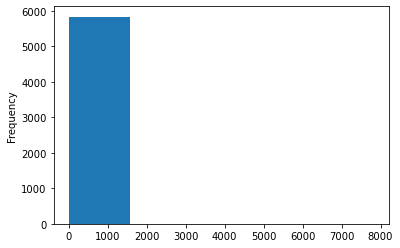

In [10]:
df['text_length'].plot.hist(bins = 5)

In [11]:
# Null or missing value rows detection

null_rows = df[df['Comments'].isnull()]

print(null_rows)

Empty DataFrame
Columns: [Comments, text_length]
Index: []


In [12]:
## converting Comments to strings
df['Comments'] = df['Comments'].astype(str)
df.shape

(5844, 2)

In [13]:
#### Cleaning--- puntuations removal,lowercase, extra spaces & url removals

In [14]:
##Removing punctuation

import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [15]:
df['Comments'].apply(remove_punctuations)
df['Comments'] = df['Comments'].apply(remove_punctuations) 

In [16]:
## lowercase
df['Comments'].apply(lambda x: x.lower())

0                                                                                                                                                                                                                                                                                                                       thank you for this
1                                                                                                                                                                                                                                                                                    that wasnt an apology it was one excuse after another
2                                                                                                                                                                                                                                                            those are probably children that are trafficked in the entertainment industry
3      

In [17]:
# Commit to Table
df['Comments'] = df['Comments'].apply(lambda x: x.lower())

In [18]:
## Extra spaces and URLs removal
df['Comments'] = df['Comments'].apply(lambda x: re.sub(r'https?\S+', '', x).strip())

In [19]:
df.head(20)

,Comments,text_length
0,thank you for this,19
1,that wasnt an apology it was one excuse after another,56
2,those are probably children that are trafficked in the entertainment industry,77
3,those are probably children that are trafficked in the entertainment industry,77
4,epstein and his group of elitists abused their power and saw the girls they used as nothing more than trash but lets not go tabloid michael paedophilia is sexual attraction to prepubescent children and that doesnt describe the girls they used as their play things \n\nwhat we are seeing in these adverts is for paedophiles,331
5,the blind could see there is an evil attack a demonic war being waged on our minds hearts and spirits,104
6,another thing i found is in one of the child ads there’s a kids drawing in the background literally depicting satan there also a folded black satanic robe and in the same ad there’s balenciaga tape except on it balenciaga is spelt “baalenciaga” with the part “baal” facing the camera and ofc baal is one of the idols they worshipped in biblical times and was known for child sacrifice similar to the child sacrifice we see in todays culture with this over sexualization abortion etc on top of that similarly how you translated “ba len ci aga” into latin and it says “do what you want” a known satanic phrase if you type “baal enci aga” it translates to baal is king they’re literally not even hiding it anymore because of how normalized it’s become,762
7,they are sorry they got caught,30
8,madeleine mccann used to carry a teddy bear around with her all the time,72
9,wyta weird sex things is and has always been a right w thing not left also i am a centrist i’m above you all 👈👉 😂,115


In [20]:
##### Tokenization using tweet tokenizer

In [21]:
import nltk
from nltk.tokenize import TweetTokenizer

# Instantiate the TweetTokenizer
tokenizer = TweetTokenizer()

# Define a function to tokenize a tweet
def tokenize_tweet(tweet):
    # Use the TweetTokenizer to tokenize the tweet
    tokens = tokenizer.tokenize(tweet)
    return tokens

# Apply the tokenization function to the 'Comments' column
df['Tokens'] = df['Comments'].apply(tokenize_tweet)

In [22]:
df.head(20)

,Comments,text_length,Tokens
0,thank you for this,19,"[thank, you, for, this]"
1,that wasnt an apology it was one excuse after another,56,"[that, wasnt, an, apology, it, was, one, excuse, after, another]"
2,those are probably children that are trafficked in the entertainment industry,77,"[those, are, probably, children, that, are, trafficked, in, the, entertainment, industry]"
3,those are probably children that are trafficked in the entertainment industry,77,"[those, are, probably, children, that, are, trafficked, in, the, entertainment, industry]"
4,epstein and his group of elitists abused their power and saw the girls they used as nothing more than trash but lets not go tabloid michael paedophilia is sexual attraction to prepubescent children and that doesnt describe the girls they used as their play things \n\nwhat we are seeing in these adverts is for paedophiles,331,"[epstein, and, his, group, of, elitists, abused, their, power, and, saw, the, girls, they, used, as, nothing, more, than, trash, but, lets, not, go, tabloid, michael, paedophilia, is, sexual, attraction, to, prepubescent, children, and, that, doesnt, describe, the, girls, they, used, as, their, play, things, what, we, are, seeing, in, these, adverts, is, for, paedophiles]"
5,the blind could see there is an evil attack a demonic war being waged on our minds hearts and spirits,104,"[the, blind, could, see, there, is, an, evil, attack, a, demonic, war, being, waged, on, our, minds, hearts, and, spirits]"
6,another thing i found is in one of the child ads there’s a kids drawing in the background literally depicting satan there also a folded black satanic robe and in the same ad there’s balenciaga tape except on it balenciaga is spelt “baalenciaga” with the part “baal” facing the camera and ofc baal is one of the idols they worshipped in biblical times and was known for child sacrifice similar to the child sacrifice we see in todays culture with this over sexualization abortion etc on top of that similarly how you translated “ba len ci aga” into latin and it says “do what you want” a known satanic phrase if you type “baal enci aga” it translates to baal is king they’re literally not even hiding it anymore because of how normalized it’s become,762,"[another, thing, i, found, is, in, one, of, the, child, ads, there, ’, s, a, kids, drawing, in, the, background, literally, depicting, satan, there, also, a, folded, black, satanic, robe, and, in, the, same, ad, there, ’, s, balenciaga, tape, except, on, it, balenciaga, is, spelt, “, baalenciaga, ”, with, the, part, “, baal, ”, facing, the, camera, and, ofc, baal, is, one, of, the, idols, they, worshipped, in, biblical, times, and, was, known, for, child, sacrifice, similar, to, the, child, sacrifice, we, see, in, todays, culture, with, this, over, sexualization, abortion, etc, on, top, of, that, similarly, how, you, ...]"
7,they are sorry they got caught,30,"[they, are, sorry, they, got, caught]"
8,madeleine mccann used to carry a teddy bear around with her all the time,72,"[madeleine, mccann, used, to, carry, a, teddy, bear, around, with, her, all, the, time]"
9,wyta weird sex things is and has always been a right w thing not left also i am a centrist i’m above you all 👈👉 😂,115,"[wyta, weird, sex, things, is, and, has, always, been, a, right, w, thing, not, left, also, i, am, a, centrist, i, ’, m, above, you, all, 👈, 👉, 😂]"


In [23]:
### removing stopwords,special characters and numbers

In [24]:
# Retrieve Stopwords
stop = stopwords.words('english')

In [25]:
# Tokenize and Remove Stop Words
df['Comments'].apply(lambda x: [word for word in x.split() if word not in stop])
df['Comments']= df['Comments'].apply(lambda x: [word for word in x.split() if word not in stop])

In [26]:
df['Comments'] = df['Comments'].astype(str)
df['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

0                                                                                                                                                                                                                                                                                                 ['thank']
1                                                                                                                                                                                                                                                          ['wasnt', 'apology', 'one', 'excuse', 'another']
2                                                                                                                                                                                                                                       ['probably', 'children', 'trafficked', 'entertainment', 'industry']
3                                                                                                   

In [27]:
# Join the words back
df['Comments'] = df['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [28]:
df.head(10)

,Comments,text_length,Tokens
0,['thank'],19,"[thank, you, for, this]"
1,"['wasnt', 'apology', 'one', 'excuse', 'another']",56,"[that, wasnt, an, apology, it, was, one, excuse, after, another]"
2,"['probably', 'children', 'trafficked', 'entertainment', 'industry']",77,"[those, are, probably, children, that, are, trafficked, in, the, entertainment, industry]"
3,"['probably', 'children', 'trafficked', 'entertainment', 'industry']",77,"[those, are, probably, children, that, are, trafficked, in, the, entertainment, industry]"
4,"['epstein', 'group', 'elitists', 'abused', 'power', 'saw', 'girls', 'used', 'nothing', 'trash', 'lets', 'go', 'tabloid', 'michael', 'paedophilia', 'sexual', 'attraction', 'prepubescent', 'children', 'doesnt', 'describe', 'girls', 'used', 'play', 'things', 'seeing', 'adverts', 'paedophiles']",331,"[epstein, and, his, group, of, elitists, abused, their, power, and, saw, the, girls, they, used, as, nothing, more, than, trash, but, lets, not, go, tabloid, michael, paedophilia, is, sexual, attraction, to, prepubescent, children, and, that, doesnt, describe, the, girls, they, used, as, their, play, things, what, we, are, seeing, in, these, adverts, is, for, paedophiles]"
5,"['blind', 'could', 'see', 'evil', 'attack', 'demonic', 'war', 'waged', 'minds', 'hearts', 'spirits']",104,"[the, blind, could, see, there, is, an, evil, attack, a, demonic, war, being, waged, on, our, minds, hearts, and, spirits]"
6,"['another', 'thing', 'found', 'one', 'child', 'ads', 'there’s', 'kids', 'drawing', 'background', 'literally', 'depicting', 'satan', 'also', 'folded', 'black', 'satanic', 'robe', 'ad', 'there’s', 'balenciaga', 'tape', 'except', 'balenciaga', 'spelt', '“baalenciaga”', 'part', '“baal”', 'facing', 'camera', 'ofc', 'baal', 'one', 'idols', 'worshipped', 'biblical', 'times', 'known', 'child', 'sacrifice', 'similar', 'child', 'sacrifice', 'see', 'todays', 'culture', 'sexualization', 'abortion', 'etc', 'top', 'similarly', 'translated', '“ba', 'len', 'ci', 'aga”', 'latin', 'says', '“do', 'want”', 'known', 'satanic', 'phrase', 'type', '“baal', 'enci', 'aga”', 'translates', 'baal', 'king', 'they’re', 'literally', 'even', 'hiding', 'anymore', 'normalized', 'it’s', 'become']",762,"[another, thing, i, found, is, in, one, of, the, child, ads, there, ’, s, a, kids, drawing, in, the, background, literally, depicting, satan, there, also, a, folded, black, satanic, robe, and, in, the, same, ad, there, ’, s, balenciaga, tape, except, on, it, balenciaga, is, spelt, “, baalenciaga, ”, with, the, part, “, baal, ”, facing, the, camera, and, ofc, baal, is, one, of, the, idols, they, worshipped, in, biblical, times, and, was, known, for, child, sacrifice, similar, to, the, child, sacrifice, we, see, in, todays, culture, with, this, over, sexualization, abortion, etc, on, top, of, that, similarly, how, you, ...]"
7,"['sorry', 'got', 'caught']",30,"[they, are, sorry, they, got, caught]"
8,"['madeleine', 'mccann', 'used', 'carry', 'teddy', 'bear', 'around', 'time']",72,"[madeleine, mccann, used, to, carry, a, teddy, bear, around, with, her, all, the, time]"
9,"['wyta', 'weird', 'sex', 'things', 'always', 'right', 'w', 'thing', 'left', 'also', 'centrist', 'i’m', '👈👉', '😂']",115,"[wyta, weird, sex, things, is, and, has, always, been, a, right, w, thing, not, left, also, i, am, a, centrist, i, ’, m, above, you, all, 👈, 👉, 😂]"


In [31]:
##Removing numbers
df['Comments'].apply(lambda x: re.sub(r'\d+', '', x))
df['Comments'] = df['Comments'].apply(lambda x: re.sub(r'\d+', '', x))

In [33]:
##Removing non-ASCII improperly encoded characters

def remove_invalid_chars(text):
    # encode the text string using ASCII encoding
    encoded_text = text.encode('ascii', 'ignore')
    # decode the encoded text using ASCII encoding
    decoded_text = encoded_text.decode('ascii')
    return decoded_text
# apply the remove_invalid_chars function to the 'Comments' column
df['Comments'] = df['Comments'].apply(remove_invalid_chars)

In [34]:
df.head(15)

,Comments,text_length,Tokens
0,['thank'],19,"[thank, you, for, this]"
1,"['wasnt', 'apology', 'one', 'excuse', 'another']",56,"[that, wasnt, an, apology, it, was, one, excuse, after, another]"
2,"['probably', 'children', 'trafficked', 'entertainment', 'industry']",77,"[those, are, probably, children, that, are, trafficked, in, the, entertainment, industry]"
3,"['probably', 'children', 'trafficked', 'entertainment', 'industry']",77,"[those, are, probably, children, that, are, trafficked, in, the, entertainment, industry]"
4,"['epstein', 'group', 'elitists', 'abused', 'power', 'saw', 'girls', 'used', 'nothing', 'trash', 'lets', 'go', 'tabloid', 'michael', 'paedophilia', 'sexual', 'attraction', 'prepubescent', 'children', 'doesnt', 'describe', 'girls', 'used', 'play', 'things', 'seeing', 'adverts', 'paedophiles']",331,"[epstein, and, his, group, of, elitists, abused, their, power, and, saw, the, girls, they, used, as, nothing, more, than, trash, but, lets, not, go, tabloid, michael, paedophilia, is, sexual, attraction, to, prepubescent, children, and, that, doesnt, describe, the, girls, they, used, as, their, play, things, what, we, are, seeing, in, these, adverts, is, for, paedophiles]"
5,"['blind', 'could', 'see', 'evil', 'attack', 'demonic', 'war', 'waged', 'minds', 'hearts', 'spirits']",104,"[the, blind, could, see, there, is, an, evil, attack, a, demonic, war, being, waged, on, our, minds, hearts, and, spirits]"
6,"['another', 'thing', 'found', 'one', 'child', 'ads', 'theres', 'kids', 'drawing', 'background', 'literally', 'depicting', 'satan', 'also', 'folded', 'black', 'satanic', 'robe', 'ad', 'theres', 'balenciaga', 'tape', 'except', 'balenciaga', 'spelt', 'baalenciaga', 'part', 'baal', 'facing', 'camera', 'ofc', 'baal', 'one', 'idols', 'worshipped', 'biblical', 'times', 'known', 'child', 'sacrifice', 'similar', 'child', 'sacrifice', 'see', 'todays', 'culture', 'sexualization', 'abortion', 'etc', 'top', 'similarly', 'translated', 'ba', 'len', 'ci', 'aga', 'latin', 'says', 'do', 'want', 'known', 'satanic', 'phrase', 'type', 'baal', 'enci', 'aga', 'translates', 'baal', 'king', 'theyre', 'literally', 'even', 'hiding', 'anymore', 'normalized', 'its', 'become']",762,"[another, thing, i, found, is, in, one, of, the, child, ads, there, ’, s, a, kids, drawing, in, the, background, literally, depicting, satan, there, also, a, folded, black, satanic, robe, and, in, the, same, ad, there, ’, s, balenciaga, tape, except, on, it, balenciaga, is, spelt, “, baalenciaga, ”, with, the, part, “, baal, ”, facing, the, camera, and, ofc, baal, is, one, of, the, idols, they, worshipped, in, biblical, times, and, was, known, for, child, sacrifice, similar, to, the, child, sacrifice, we, see, in, todays, culture, with, this, over, sexualization, abortion, etc, on, top, of, that, similarly, how, you, ...]"
7,"['sorry', 'got', 'caught']",30,"[they, are, sorry, they, got, caught]"
8,"['madeleine', 'mccann', 'used', 'carry', 'teddy', 'bear', 'around', 'time']",72,"[madeleine, mccann, used, to, carry, a, teddy, bear, around, with, her, all, the, time]"
9,"['wyta', 'weird', 'sex', 'things', 'always', 'right', 'w', 'thing', 'left', 'also', 'centrist', 'im', '', '']",115,"[wyta, weird, sex, things, is, and, has, always, been, a, right, w, thing, not, left, also, i, am, a, centrist, i, ’, m, above, you, all, 👈, 👉, 😂]"


In [35]:
### Lemmatize

In [36]:
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()

In [37]:
df['Comments'].apply(lambda x: lemmatizer.lemmatize(x))

0                                                                                                                                                                                                                                                                                                 ['thank']
1                                                                                                                                                                                                                                                          ['wasnt', 'apology', 'one', 'excuse', 'another']
2                                                                                                                                                                                                                                       ['probably', 'children', 'trafficked', 'entertainment', 'industry']
3                                                                                                   

In [38]:
# Commit to Table
df['Comments'] = df['Comments'].apply(lambda x: lemmatizer.lemmatize(x))

In [39]:
### POS Tagging

In [40]:
def pos_tagging(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    # Perform POS tagging
    tagged_tokens = nltk.pos_tag(tokens)
    # Return the tagged tokens
    return tagged_tokens

In [41]:
# Applying the POS tagging function to the 'Comments' column
df['POS_Tagged'] = df['Comments'].apply(pos_tagging)

In [42]:
df['POS_Tagged']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             [([, JJ), ('thank, NNP), (', POS), (], NN)]
1                             

In [43]:
### Model selections and preparations
# Huggingface pipeline for quick and easy way to run sentiment predictions
# VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
# Roberta Pretrained Model

In [44]:
## 1-[Huggingface pipeline]--- quick and easy way to run sentiment predictions
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [45]:
df.head(15)

,Comments,text_length,Tokens,POS_Tagged
0,['thank'],19,"[thank, you, for, this]","[([, JJ), ('thank, NNP), (', POS), (], NN)]"
1,"['wasnt', 'apology', 'one', 'excuse', 'another']",56,"[that, wasnt, an, apology, it, was, one, excuse, after, another]","[([, JJ), ('wasnt, NNP), (', POS), (,, ,), ('apology, NNP), (', POS), (,, ,), ('one, CD), (', ''), (,, ,), ('excuse, IN), (', ''), (,, ,), ('another, PRP), (', POS), (], NNS)]"
2,"['probably', 'children', 'trafficked', 'entertainment', 'industry']",77,"[those, are, probably, children, that, are, trafficked, in, the, entertainment, industry]","[([, NN), ('probably, RB), (', ''), (,, ,), ('children, NNP), (', POS), (,, ,), ('trafficked, VBD), (', ''), (,, ,), ('entertainment, NNP), (', POS), (,, ,), ('industry, ''), (', POS), (], NN)]"
3,"['probably', 'children', 'trafficked', 'entertainment', 'industry']",77,"[those, are, probably, children, that, are, trafficked, in, the, entertainment, industry]","[([, NN), ('probably, RB), (', ''), (,, ,), ('children, NNP), (', POS), (,, ,), ('trafficked, VBD), (', ''), (,, ,), ('entertainment, NNP), (', POS), (,, ,), ('industry, ''), (', POS), (], NN)]"
4,"['epstein', 'group', 'elitists', 'abused', 'power', 'saw', 'girls', 'used', 'nothing', 'trash', 'lets', 'go', 'tabloid', 'michael', 'paedophilia', 'sexual', 'attraction', 'prepubescent', 'children', 'doesnt', 'describe', 'girls', 'used', 'play', 'things', 'seeing', 'adverts', 'paedophiles']",331,"[epstein, and, his, group, of, elitists, abused, their, power, and, saw, the, girls, they, used, as, nothing, more, than, trash, but, lets, not, go, tabloid, michael, paedophilia, is, sexual, attraction, to, prepubescent, children, and, that, doesnt, describe, the, girls, they, used, as, their, play, things, what, we, are, seeing, in, these, adverts, is, for, paedophiles]","[([, JJ), ('epstein, NNP), (', POS), (,, ,), ('group, NNP), (', POS), (,, ,), ('elitists, NNS), (', POS), (,, ,), ('abused, VBD), (', ''), (,, ,), ('power, JJR), (', ''), (,, ,), ('saw, NNP), (', POS), (,, ,), ('girls, NNP), (', POS), (,, ,), ('used, VBD), (', ''), (,, ,), ('nothing, VBG), (', ''), (,, ,), ('trash, NNP), (', POS), (,, ,), ('lets, NNS), (', POS), (,, ,), ('go, NNP), (', POS), (,, ,), ('tabloid, ''), (', ''), (,, ,), ('michael, NNP), (', POS), (,, ,), ('paedophilia, NNP), (', POS), (,, ,), ('sexual, JJ), (', ''), (,, ,), ('attraction, NNP), (', POS), (,, ,), ('prepubescent, NNP), (', POS), (,, ,), ('children, NNP), (', POS), (,, ,), ('doesnt, NNP), (', POS), (,, ,), ('describe, NNP), (', POS), (,, ,), ('girls, NNP), (', POS), (,, ,), ('used, VBD), (', ''), (,, ,), ('play, ''), (', ''), (,, ,), ('things, NNS), (', POS), (,, ,), ('seeing, VBG), (', ''), (,, ,), ('adverts, NNS), (', POS), (,, ,), ('paedophiles, NNS), (', POS), (], NN)]"
5,"['blind', 'could', 'see', 'evil', 'attack', 'demonic', 'war', 'waged', 'minds', 'hearts', 'spirits']",104,"[the, blind, could, see, there, is, an, evil, attack, a, demonic, war, being, waged, on, our, minds, hearts, and, spirits]","[([, JJ), ('blind, NNP), (', POS), (,, ,), ('could, MD), (', ''), (,, ,), ('see, NNP), (', POS), (,, ,), ('evil, NNP), (', POS), (,, ,), ('attack, ''), (', ''), (,, ,), ('demonic, NNP), (', POS), (,, ,), ('war, NNP), (', POS), (,, ,), ('waged, VBD), (', ''), (,, ,), ('minds, VBZ), (', POS), (,, ,), ('hearts, NNS), (', POS), (,, ,), ('spirits, NNS), (', POS), (], NN)]"
6,"['another', 'thing', 'found', 'one', 'child', 'ads', 'theres', 'kids', 'drawing', 'background', 'literally', 'depicting', 'satan', 'also', 'folded', 'black', 'satanic', 'robe', 'ad', 'theres', 'balenciaga', 'tape', 'except', 'balenciaga', 'spelt', 'baalenciaga', 'part', 'baal', 'facing', 'camera', 'ofc', 'baal', 'one', 'idols', 'worshipped', 'biblical', 'times', 'known', 'child', 'sacrifice', 'similar', 'child', 'sacrifice', 'see', 'todays', 'culture', 'sexualization', 'abortion', 'etc', 'top', 'similarly', 'translated', 'ba', 'len', 'ci', 'aga', 'latin', 'says', 'do', 'want', 'known', 'sa

In [46]:
sent_pipeline('probably children trafficked entertainment industry	')

[{'label': 'NEGATIVE', 'score': 0.979620635509491}]

In [47]:
sent_pipeline('madeleine mccann used carry teddy bear around time	')

[{'label': 'NEGATIVE', 'score': 0.9652188420295715}]

In [49]:
sent_pipeline('thank.  ')

[{'label': 'POSITIVE', 'score': 0.9998296499252319}]

In [50]:
## 2.[VADER Seniment Scoring]---We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

#This uses a "bag of words" approach:1.Stop words are removed 2.each word is scored and combined to a total score.

In [51]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [52]:
sia = SentimentIntensityAnalyzer()

In [53]:
sia.polarity_scores('probably children trafficked entertainment industry	')

{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.4215}

In [54]:
sia.polarity_scores('madeleine mccann used carry teddy bear around time	')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [55]:
sia.polarity_scores('thank this.	')

{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}

In [56]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Comments']
    myid = row['Comments']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/5844 [00:00<?, ?it/s]

In [57]:
vaders = pd.DataFrame(res).T

vaders = vaders.reset_index().rename(columns={'index': 'Comments'})
vaders = vaders.merge(df, how='right')


In [58]:
# Now we have sentiment score and metadata
vaders.head(25)


,Comments,neg,neu,pos,compound,text_length,Tokens,POS_Tagged
0,['thank'],0.0,1.0,0.0,0.0,19,"[thank, you, for, this]","[([, JJ), ('thank, NNP), (', POS), (], NN)]"
1,"['wasnt', 'apology', 'one', 'excuse', 'another']",0.0,1.0,0.0,0.0,56,"[that, wasnt, an, apology, it, was, one, excuse, after, another]","[([, JJ), ('wasnt, NNP), (', POS), (,, ,), ('apology, NNP), (', POS), (,, ,), ('one, CD), (', ''), (,, ,), ('excuse, IN), (', ''), (,, ,), ('another, PRP), (', POS), (], NNS)]"
2,"['probably', 'children', 'trafficked', 'entertainment', 'industry']",0.0,1.0,0.0,0.0,77,"[those, are, probably, children, that, are, trafficked, in, the, entertainment, industry]","[([, NN), ('probably, RB), (', ''), (,, ,), ('children, NNP), (', POS), (,, ,), ('trafficked, VBD), (', ''), (,, ,), ('entertainment, NNP), (', POS), (,, ,), ('industry, ''), (', POS), (], NN)]"
3,"['probably', 'children', 'trafficked', 'entertainment', 'industry']",0.0,1.0,0.0,0.0,77,"[those, are, probably, children, that, are, trafficked, in, the, entertainment, industry]","[([, NN), ('probably, RB), (', ''), (,, ,), ('children, NNP), (', POS), (,, ,), ('trafficked, VBD), (', ''), (,, ,), ('entertainment, NNP), (', POS), (,, ,), ('industry, ''), (', POS), (], NN)]"
4,"['epstein', 'group', 'elitists', 'abused', 'power', 'saw', 'girls', 'used', 'nothing', 'trash', 'lets', 'go', 'tabloid', 'michael', 'paedophilia', 'sexual', 'attraction', 'prepubescent', 'children', 'doesnt', 'describe', 'girls', 'used', 'play', 'things', 'seeing', 'adverts', 'paedophiles']",0.0,1.0,0.0,0.0,331,"[epstein, and, his, group, of, elitists, abused, their, power, and, saw, the, girls, they, used, as, nothing, more, than, trash, but, lets, not, go, tabloid, michael, paedophilia, is, sexual, attraction, to, prepubescent, children, and, that, doesnt, describe, the, girls, they, used, as, their, play, things, what, we, are, seeing, in, these, adverts, is, for, paedophiles]","[([, JJ), ('epstein, NNP), (', POS), (,, ,), ('group, NNP), (', POS), (,, ,), ('elitists, NNS), (', POS), (,, ,), ('abused, VBD), (', ''), (,, ,), ('power, JJR), (', ''), (,, ,), ('saw, NNP), (', POS), (,, ,), ('girls, NNP), (', POS), (,, ,), ('used, VBD), (', ''), (,, ,), ('nothing, VBG), (', ''), (,, ,), ('trash, NNP), (', POS), (,, ,), ('lets, NNS), (', POS), (,, ,), ('go, NNP), (', POS), (,, ,), ('tabloid, ''), (', ''), (,, ,), ('michael, NNP), (', POS), (,, ,), ('paedophilia, NNP), (', POS), (,, ,), ('sexual, JJ), (', ''), (,, ,), ('attraction, NNP), (', POS), (,, ,), ('prepubescent, NNP), (', POS), (,, ,), ('children, NNP), (', POS), (,, ,), ('doesnt, NNP), (', POS), (,, ,), ('describe, NNP), (', POS), (,, ,), ('girls, NNP), (', POS), (,, ,), ('used, VBD), (', ''), (,, ,), ('play, ''), (', ''), (,, ,), ('things, NNS), (', POS), (,, ,), ('seeing, VBG), (', ''), (,, ,), ('adverts, NNS), (', POS), (,, ,), ('paedophiles, NNS), (', POS), (], NN)]"
5,"['blind', 'could', 'see', 'evil', 'attack', 'demonic', 'war', 'waged', 'minds', 'hearts', 'spirits']",0.0,1.0,0.0,0.0,104,"[the, blind, could, see, there, is, an, evil, attack, a, demonic, war, being, waged, on, our, minds, hearts, and, spirits]","[([, JJ), ('blind, NNP), (', POS), (,, ,), ('could, MD), (', ''), (,, ,), ('see, NNP), (', POS), (,, ,), ('evil, NNP), (', POS), (,, ,), ('attack, ''), (', ''), (,, ,), ('demonic, NNP), (', POS), (,, ,), ('war, NNP), (', POS), (,, ,), ('waged, VBD), (', ''), (,, ,), ('minds, VBZ), (', POS), (,, ,), ('hearts, NNS), (', POS), (,, ,), ('spirits, NNS), (', POS), (], NN)]"
6,"['another', 'thing', 'found', 'one', 'child', 'ads', 'theres', 'kids', 'drawing', 'background', 'literally', 'depicting', 'satan', 'also', 'folded', 'black', 'satanic', 'robe', 'ad', 'theres', 'balenciaga', 'tape', 'except', 'balenciaga', 'spelt', 'baalenciaga', 'part', 'baal', 'facing', 'camera', 'ofc', 'baal', 'one', 'idols', 'worshipped', 'biblical', 'times', 'known', 'child', 'sacrifice', 'similar', 'child', 'sacrifice', 'see', 'todays', 'culture', 'sexualization', 'abor

In [59]:
## 3.[Roberta Pretrained Model]--- 1.Use a model trained of a large corpus of data. , 2.Transformer model accounts for the words but also the context related to other words. 3 compare result with vader

In [60]:
## Importing model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [61]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [62]:
## To check and compare polarity scores from vader against roberta we'll create an object( lets say Sample) containing random tweet.
Sample = df['Comments'][8]
print(Sample)

['madeleine', 'mccann', 'used', 'carry', 'teddy', 'bear', 'around', 'time']


In [63]:
sia.polarity_scores(Sample)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [64]:
# Run for Roberta Model
encoded_text = tokenizer(Sample, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.1144034, 'roberta_neu': 0.83925825, 'roberta_pos': 0.046338324}


In [66]:
def polarity_scores_roberta(Sample):
    encoded_text = tokenizer(Sample, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [67]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Comments']
        myid = row['Comments']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/5844 [00:00<?, ?it/s]

Broke for id ['shalom', 'please', 'allow', 'open', 'eyes', 'certain', 'dark', 'forces', 'world', 'please', 'allow', 'share', 'perspective', 'person', 'walked', 'darkness', 'criminal', 'incarserated', 'years', 'studying', 'word', 'scriptures', 'religions', 'doctrines', 'still', 'participated', 'criminal', 'activities', 'race', 'gang', 'politics', 'prison', 'mix', 'religions', 'like', 'gangs', 'race', 'politics', 'asatru', 'pegan', 'religion', 'certain', 'factions', 'white', 'supremist', 'follow', 'refuse', 'want', 'follow', 'jewish', 'god', 'asatru', 'warrior', 'religion', 'pegans', 'let', 'tell', 'criminal', 'world', 'although', 'guys', 'may', 'violent', 'put', 'work', 'including', 'extortion', 'let', 'guys', 'know', 'serious', 'shit', 'gets', 'extortion', 'act', 'succeed', 'serious', 'threat', 'certian', 'factions', 'pegans', 'taken', 'lightly', 'factions', 'peganinism', 'like', 'wiccans', 'males', 'feminant', 'giving', 'dominant', 'men', 'sexual', 'services', 'behind', 'backs', 'cast

In [70]:
## Comparing the results of the two models- Vader vs Roberta
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Comments'})
results_df.columns


Index(['Comments', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos'],
      dtype='object')

In [72]:
results_df.head(50)

,Comments,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
0,['thank'],0.0,1.0,0.0,0.0,0.068008,0.788131,0.143861
1,"['wasnt', 'apology', 'one', 'excuse', 'another']",0.0,1.0,0.0,0.0,0.297826,0.657236,0.044939
2,"['probably', 'children', 'trafficked', 'entertainment', 'industry']",0.0,1.0,0.0,0.0,0.551619,0.429157,0.019224
3,"['epstein', 'group', 'elitists', 'abused', 'power', 'saw', 'girls', 'used', 'nothing', 'trash', 'lets', 'go', 'tabloid', 'michael', 'paedophilia', 'sexual', 'attraction', 'prepubescent', 'children', 'doesnt', 'describe', 'girls', 'used', 'play', 'things', 'seeing', 'adverts', 'paedophiles']",0.0,1.0,0.0,0.0,0.769158,0.218285,0.012557
4,"['blind', 'could', 'see', 'evil', 'attack', 'demonic', 'war', 'waged', 'minds', 'hearts', 'spirits']",0.0,1.0,0.0,0.0,0.731243,0.256541,0.012216
5,"['another', 'thing', 'found', 'one', 'child', 'ads', 'theres', 'kids', 'drawing', 'background', 'literally', 'depicting', 'satan', 'also', 'folded', 'black', 'satanic', 'robe', 'ad', 'theres', 'balenciaga', 'tape', 'except', 'balenciaga', 'spelt', 'baalenciaga', 'part', 'baal', 'facing', 'camera', 'ofc', 'baal', 'one', 'idols', 'worshipped', 'biblical', 'times', 'known', 'child', 'sacrifice', 'similar', 'child', 'sacrifice', 'see', 'todays', 'culture', 'sexualization', 'abortion', 'etc', 'top', 'similarly', 'translated', 'ba', 'len', 'ci', 'aga', 'latin', 'says', 'do', 'want', 'known', 'satanic', 'phrase', 'type', 'baal', 'enci', 'aga', 'translates', 'baal', 'king', 'theyre', 'literally', 'even', 'hiding', 'anymore', 'normalized', 'its', 'become']",0.0,1.0,0.0,0.0,0.313439,0.645891,0.040670
6,"['sorry', 'got', 'caught']",0.0,1.0,0.0,0.0,0.577628,0.383800,0.038572
7,"['madeleine', 'mccann', 'used', 'carry', 'teddy', 'bear', 'around', 'time']",0.0,1.0,0.0,0.0,0.114403,0.839258,0.046338
8,"['wyta', 'weird', 'sex', 'things', 'always', 'right', 'w', 'thing', 'left', 'also', 'centrist', 'im', '', '']",0.0,1.0,0.0,0.0,0.340489,0.614605,0.044906
9,"['pedogate', 'real', 'yet', 'podesta', 'brothers', 'high', 'level', 'government', 'hollywood', 'elites', 'walk', 'around', 'blood', 'hands']",0.0,1.0,0.0,0.0,0.150707,0.794356,0.054937


In [ ]:
##### SUMMARY OF THE MODELS(Roberta vs Vader)

####Roberta and VADER (Valence Aware Dictionary and sEntiment Reasoner) are both popular options for sentiment analysis, but they have different strengths and weaknesses.

### Defining models
## Roberta-- 
#1-RoBERTa (short for Robustly optimized BERT approach) is a language model developed by Facebook AI in 2019. It is a variant of the popular BERT (Bidirectional Encoder Representations from Transformers) model, which is based on the Transformer architecture. RoBERTa was designed to address some of the limitations of BERT and to improve the performance of language understanding tasks.
#2-RoBERTa is pre-trained on a large corpus of text using an unsupervised learning approach called masked language modeling. During training, some words in the input text are randomly masked, and the model is trained to predict the masked words based on the context provided by the surrounding words. RoBERTa also uses a larger training corpus and longer training time than BERT, as well as some other optimization techniques, such as dynamic masking, to improve performance. 
#3-RoBERTa has achieved state-of-the-art performance on a wide range of natural language processing tasks, including question answering, sentiment analysis, and natural language inference. It has also been used as a base model for various downstream tasks, where its pre-trained representations are fine-tuned on smaller labeled datasets to achieve even better performance.

## vader-- 
#1-VADER (Valence Aware Dictionary and sEntiment Reasoner) is a rule-based sentiment analysis model developed by researchers at the Georgia Institute of Technology in 2014. It is designed to analyze the sentiment of a piece of text and determine whether the sentiment is positive, negative, or neutral.
#2-VADER uses a lexicon (a dictionary of words and their sentiment scores) to analyze the sentiment of a piece of text. The lexicon includes words that are associated with positive or negative sentiment, as well as words that are considered to be neutral. In addition to the lexicon, VADER uses a set of rules to take into account the grammatical and syntactical structure of the text, as well as other features such as punctuation and capitalization.
#3-VADER is particularly well-suited to analyze social media content, where the use of informal language, sarcasm, and other forms of figurative language can make sentiment analysis more challenging. VADER has been shown to perform well on a range of sentiment analysis tasks, including product reviews, social media posts, and movie reviews.


### Comparision(Roberta vs Vader)
#Roberta is a language model based on the Transformer architecture that can be fine-tuned for various natural language processing tasks, including sentiment analysis.
#Roberta is known for its high accuracy and robustness in handling a variety of text types and languages, making it a good choice for sentiment analysis tasks that involve complex, nuanced language.

#On the other hand, VADER is a rule-based (Simple NLTK) sentiment analysis tool that uses a lexicon of words and their associated sentiment scores to determine the overall sentiment of a text. VADER is fast and easy to use, and it performs well on short, informal texts like social media posts and product reviews.
#One limitation of VADER is that it relies solely on a lexicon and rules, which may not be able to capture the full complexity of language and context. Therefore, it may not be as accurate as other, more sophisticated sentiment analysis models on certain types of text. However, VADER remains a popular and widely-used model, particularly for applications where speed and simplicity are more important than accuracy.
## which tool is better???


##Which tool is better for sentiment analysis depends on the specific use case and the characteristics of the text data being analyzed. If the text is complex and nuanced, Roberta may be a better choice due to its high accuracy and ability to handle various languages. However, if the text is short and informal, VADER may be a more practical choice due to its simplicity and speed.
# AS comparing the results of the 2 models that we ran on our large corpus of complex and nuanced text data roberta has out performed vader as in results we can see that upon running the data through vader model, it has labeled all the comments as neutral whereas the Roberta has accurately divided comments ie the textual data,into well defined labels(neg, pos,neu) with exacts accurate scores that the text in comments column actually represents.
